<a href="https://colab.research.google.com/github/maulik-vyas/Tensors-Fundamentals/blob/main/Transfer_Learning_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-23 22:16:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2023-03-23 22:16:14 (18.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, walk_through_dir, unzip_data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-03-23 22:19:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.3MB/s    in 8.0s    

2023-03-23 22:19:32 (20.1 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE,
                                                                 label_mode="categorical"
                                                                 )

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                           label_mode="categorical"
                                                                           )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)
print(f"Shape of the model after passing the input: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after Global Average Pooling: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_0 = model_0.fit(train_data_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="10_percent_feature_extraction")])

16705208/16705208 [==============================] - 2s 0us/step


Shape of the model after passing the input: (None, 7, 7, 1280)
Shape after Global Average Pooling: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230323-221956
Epoch 1/5
24/24 [==============================] - 25s 436ms/step - loss: 1.9051 - accuracy: 0.4333 - val_loss: 1.3055 - val_accuracy: 0.7296
Epoch 2/5
24/24 [==============================] - 8s 330ms/step - loss: 1.1094 - accuracy: 0.7720 - val_loss: 0.8757 - val_accuracy: 0.8160
Epoch 3/5
24/24 [==============================] - 8s 338ms/step - loss: 0.7947 - accuracy: 0.8253 - val_loss: 0.7000 - val_accuracy: 0.8388
Epoch 4/5
24/24 [==============================] - 7s 291ms/step - loss: 0.6436 - accuracy: 0.8627 - val_loss: 0.6142 - val_accuracy: 0.8476
Epoch 5/5
24/24 [==============================] - 7s 295ms/step - loss: 0.5526 - accuracy: 0.8867 - val_loss: 0.5574 - val_accuracy: 0.8576


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 76ms/step - loss: 0.5574 - accuracy: 0.8576


[0.5573620796203613, 0.8575999736785889]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [ ]:
len(base_model.layers)

238

In [ ]:
len(model_0.layers)

4

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


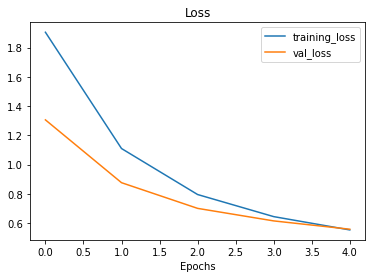

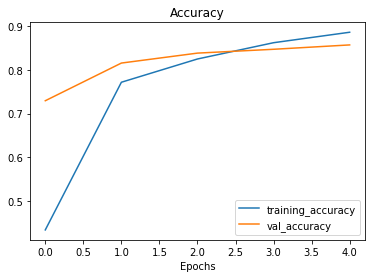

In [ ]:
plot_loss_curves(history_0)

# Model - 1

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2023-03-23 22:22:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 172.217.194.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  22.8MB/s    in 6.5s    

2023-03-23 22:23:05 (19.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data("10_food_classes_1_percent.zip")

In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                               label_mode="categorical",
                                                                               image_size=IMAGE_SIZE,
                                                                               batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                 label_mode="categorical",
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
], name="data_augmentation")

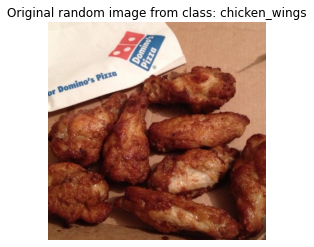

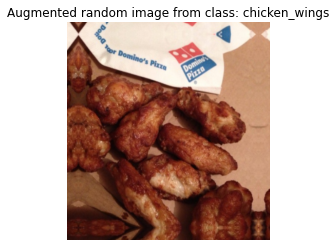

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class: {target_class}")
plt.axis(False);

augmented_image = data_augmentation(img)
plt.figure()
plt.imshow(augmented_image/255.)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

# Model 1

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_augmentation(inputs)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model1 = keras.Model(inputs, outputs)

model1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history_1_percent = model1.fit(train_data_1_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_1_percent),
                               validation_data=test_data,
                               validation_steps=len(test_data),
                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                      experiment_name="1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230323-222649
Epoch 1/5


3/3 [==============================] - ETA: 0s - loss: 2.2839 - accuracy: 0.1571

3/3 [==============================] - 17s 4s/step - loss: 2.2839 - accuracy: 0.1571 - val_loss: 2.2420 - val_accuracy: 0.2012
Epoch 2/5
3/3 [==============================] - 8s 3s/step - loss: 2.0473 - accuracy: 0.2429 - val_loss: 2.1095 - val_accuracy: 0.2840
Epoch 3/5
3/3 [==============================] - 8s 4s/step - loss: 1.8812 - accuracy: 0.4429 - val_loss: 1.9951 - val_accuracy: 0.3580
Epoch 4/5
3/3 [==============================] - 8s 4s/step - loss: 1.6981 - accuracy: 0.6571 - val_loss: 1.8924 - val_accuracy: 0.4132
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.5402 - accuracy: 0.7143 - val_loss: 1.8000 - val_accuracy: 0.4624


In [ ]:
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
model1.evaluate(test_data)

79/79 [==============================] - 7s 73ms/step - loss: 1.8000 - accuracy: 0.4624


[1.7999567985534668, 0.46239998936653137]

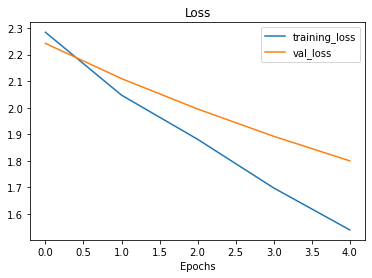

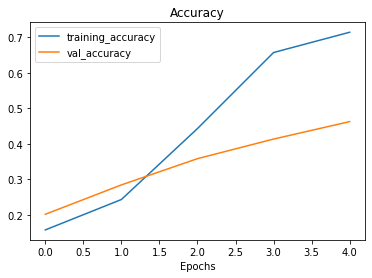

In [ ]:
plot_loss_curves(history_1_percent)

# Model 2

In [ ]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                                label_mode="categorical",
                                                                                image_size=IMAGE_SIZE,
                                                                                batch_size=BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                    label_mode="categorical",
                                                                    image_size=IMAGE_SIZE,
                                                                    batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
], name="data_augmentation")

In [ ]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_2D")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model2 = tf.keras.Model(inputs, outputs)

model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [ ]:
checkpoint_path = "ten_precent_model_checkpoints_weights/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [ ]:
initial_epochs = 5


history2 = model2.fit(train_data_10_percent,
                      epochs=initial_epochs,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data,
                      validation_steps=len(test_data),
                      callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                             experiment_name="10_percent_data_aug"),
                                 checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230323-224251
Epoch 1/5


24/24 [==============================] - ETA: 0s - loss: 1.9796 - accuracy: 0.3480
Epoch 1: saving model to ten_precent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 24s 638ms/step - loss: 1.9796 - accuracy: 0.3480 - val_loss: 1.3991 - val_accuracy: 0.6920
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3091 - accuracy: 0.6747
Epoch 2: saving model to ten_precent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 589ms/step - loss: 1.3091 - accuracy: 0.6747 - val_loss: 0.9808 - val_accuracy: 0.7912
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0137 - accuracy: 0.7547
Epoch 3: saving model to ten_precent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 807ms/step - loss: 1.0137 - accuracy: 0.7547 - val_loss: 0.7878 - val_accuracy: 0.8164
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8435 - accuracy: 0.7720
Epoch

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.5574 - accuracy: 0.8576


[0.5573620796203613, 0.8575999736785889]

In [ ]:
result_10_percent_model = model2.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.6198 - accuracy: 0.8432


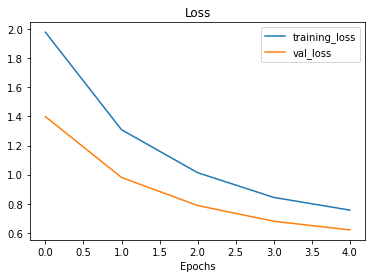

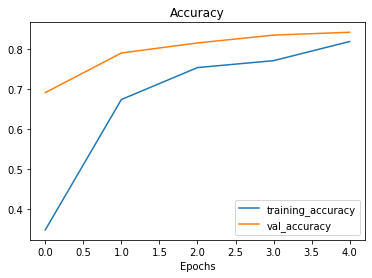

In [ ]:
plot_loss_curves(history2)

In [ ]:
model2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_result = model2.evaluate(test_data)

79/79 [==============================] - 7s 82ms/step - loss: 0.6100 - accuracy: 0.8500


In [ ]:
result_10_percent_model == loaded_weights_result

False

In [ ]:
import numpy as np
np.isclose(np.array(result_10_percent_model), np.array(loaded_weights_result))

array([ True,  True])

In [ ]:
model2.layers

In [ ]:
for layer in model2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fd220110a30> True
<keras.engine.sequential.Sequential object at 0x7fd221179490> True
<keras.engine.functional.Functional object at 0x7fd20bc7ca00> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7fd20bb88d60> True
<keras.layers.core.dense.Dense object at 0x7fd1f400fd90> True


In [ ]:
for i, layer in enumerate(model2.layers[2].layers):
  print(i, layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7fd221184520> False
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7fd221184850> False
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7fd20bf57ee0> False
3 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7fd1f408bac0> False
4 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7fd20bf4ea00> False
5 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fd22144d910> False
6 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd2214a10a0> False
7 <keras.layers.core.activation.Activation object at 0x7fd20beb0fd0> False
8 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7fd20bebf610> False
9 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd20beba610> False
10 <keras.layers.core.activation.Activation object at 0x7fd20beba310> False
11 <keras.layers.pooling.global_average_pool

In [ ]:
print(len(model2.layers[2].trainable_variables))

0


In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [ ]:
for i, layer in enumerate(model2.layers[2].layers):
  print(i, layer, layer.trainable)

0 <keras.engine.input_layer.InputLayer object at 0x7fd2156aceb0> False
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7fd2156adca0> False
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7fd2c19792e0> False
3 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7fd2c1f0ef70> False
4 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x7fd2c0ab3520> False
5 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fd2c0aa6820> False
6 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd2c0aa6eb0> False
7 <keras.layers.core.activation.Activation object at 0x7fd20bf247c0> False
8 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x7fd2c0aa6c70> False
9 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fd20bf2aaf0> False
10 <keras.layers.core.activation.Activation object at 0x7fd215649910> False
11 <keras.layers.pooling.global_average_pool

In [ ]:
print(len(model2.trainable_variables))

12


In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_data_aug = model2.fit(train_data_10_percent,
                                              epochs=fine_tune_epochs,
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              initial_epoch=history2.epoch[-1],
                                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                     experiment_name="10_percent_fine_tuning_data_aug")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tuning_data_aug/20230323-225556
Epoch 5/10


24/24 [==============================] - 26s 637ms/step - loss: 0.7035 - accuracy: 0.7747 - val_loss: 0.5756 - val_accuracy: 0.8108
Epoch 6/10
24/24 [==============================] - 19s 802ms/step - loss: 0.3869 - accuracy: 0.8827 - val_loss: 0.4461 - val_accuracy: 0.8536
Epoch 7/10
24/24 [==============================] - 13s 551ms/step - loss: 0.2021 - accuracy: 0.9400 - val_loss: 0.4790 - val_accuracy: 0.8512
Epoch 8/10
24/24 [==============================] - 13s 528ms/step - loss: 0.1775 - accuracy: 0.9520 - val_loss: 0.4065 - val_accuracy: 0.8720
Epoch 9/10
24/24 [==============================] - 14s 574ms/step - loss: 0.1278 - accuracy: 0.9653 - val_loss: 0.4892 - val_accuracy: 0.8456
Epoch 10/10
24/24 [==============================] - 14s 566ms/step - loss: 0.1222 - accuracy: 0.9627 - val_loss: 0.4977 - val_accuracy: 0.8420


In [ ]:
results_fine_tune_10_percent = model2.evaluate(test_data)

79/79 [==============================] - 7s 82ms/step - loss: 0.4977 - accuracy: 0.8420


In [ ]:
result_10_percent_model

[0.6198391318321228, 0.8432000279426575]

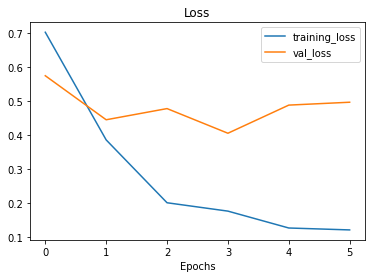

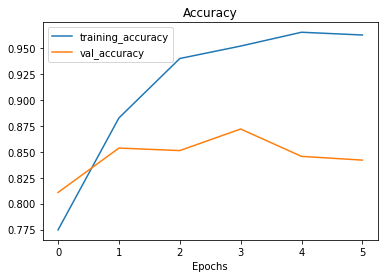

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(total_acc, label="Training Accuracy")
  plt.plot(total_val_acc, label="Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Accuracy")

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 2)
  plt.plot(total_loss, label="Training Loss")
  plt.plot(total_val_loss, label="Val Loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tuning")
  plt.legend(loc="upper right")
  plt.title("Training and Validation Loss")

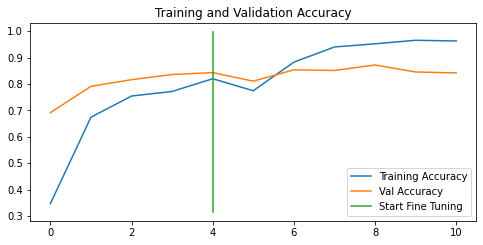

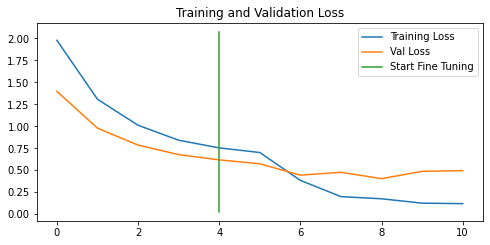

In [ ]:
compare_historys(history2, history_fine_10_percent_data_aug)

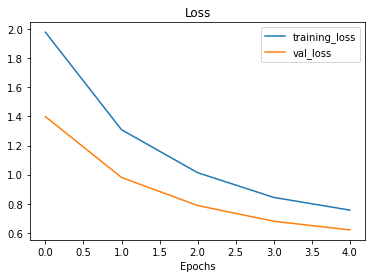

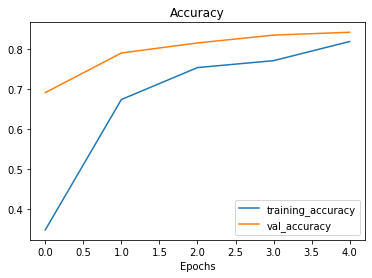

In [ ]:
plot_loss_curves(history2)

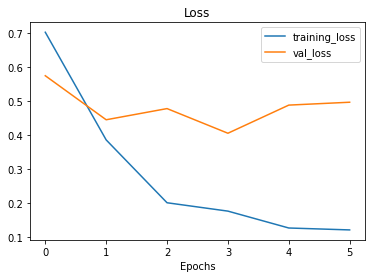

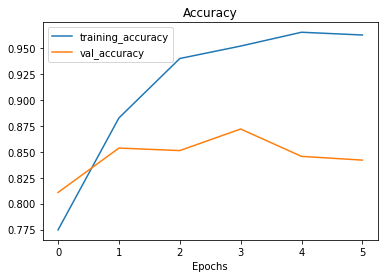

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug)

# Model 4

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-03-23 22:58:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  23.6MB/s    in 22s     

2023-03-23 22:58:33 (22.5 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [ ]:
import tensorflow as tf

IMAGE_SIZE = (224, 224)

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMAGE_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model2.evaluate(test_data)

79/79 [==============================] - 7s 79ms/step - loss: 0.4977 - accuracy: 0.8420


[0.4977015554904938, 0.8420000076293945]

In [ ]:
results_fine_tune_10_percent

[0.4977016746997833, 0.8420000076293945]

In [ ]:
model2.load_weights(checkpoint_path)

ValueError: ignored

In [ ]:
model2.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.6198 - accuracy: 0.8432


[0.6198392510414124, 0.8432000279426575]

In [ ]:
result_10_percent_model

[0.6198391318321228, 0.8432000279426575]

In [ ]:
for layer_number, layer in enumerate(model2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_2D True
4 output_layer True


In [ ]:
for layer_number, layer in enumerate(model2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_4 False
1 rescaling_6 False
2 normalization_3 False
3 rescaling_7 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
model2.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model2.fit(train_data_10_classes_full,
                                          epochs=fine_tune_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)),
                                          initial_epoch=history2.epoch[-1],
                                          callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                 experiment_name="full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230323-230621
Epoch 5/10
235/235 [==============================] - 81s 339ms/step - loss: 0.6024 - accuracy: 0.8024 - val_loss: 0.3499 - val_accuracy: 0.8931
Epoch 6/10
235/235 [==============================] - 75s 318ms/step - loss: 0.4964 - accuracy: 0.8400 - val_loss: 0.2989 - val_accuracy: 0.9112
Epoch 7/10
235/235 [==============================] - 73s 308ms/step - loss: 0.4502 - accuracy: 0.8545 - val_loss: 0.3147 - val_accuracy: 0.9046
Epoch 8/10
235/235 [==============================] - 72s 305ms/step - loss: 0.4138 - accuracy: 0.8636 - val_loss: 0.3204 - val_accuracy: 0.9046
Epoch 9/10
235/235 [==============================] - 70s 298ms/step - loss: 0.3748 - accuracy: 0.8796 - val_loss: 0.3090 - val_accuracy: 0.9194
Epoch 10/10
235/235 [==============================] - 69s 290ms/step - loss: 0.3581 - accuracy: 0.8843 - val_loss: 0.2695 - val_accuracy: 0.9260


In [ ]:
results_fine_tune_full_data = model2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 7s 81ms/step - loss: 0.2599 - accuracy: 0.9196


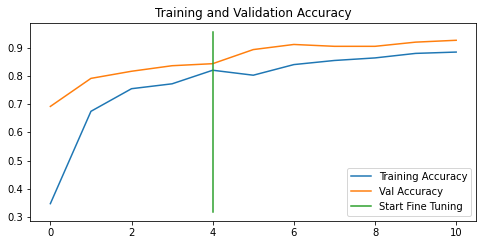

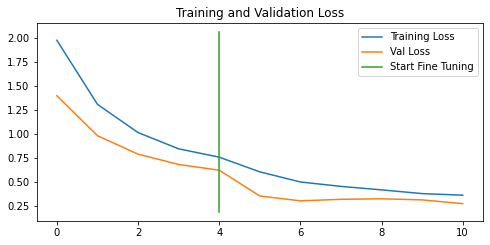

In [ ]:
compare_historys(original_history=history2,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer Learning Experiments with 10 Food101 Classes" \
  --description "Transfer Learning Exoeriments" \
  --one_shot

2023-03-23 23:31:00.637638: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-23 23:31:00.637740: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-23 23:31:00.637759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBo